In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import quandl
from scipy.optimize import minimize
from pandas import Series
from pandas import DataFrame

In [2]:
df = pd.read_csv('Exam_Industry.csv',index_col=0,parse_dates=True)
mk = pd.read_csv('Exam_Market.csv',index_col=0,parse_dates=True)

#### import regression tools

In [3]:
import statsmodels.api as sm

In [4]:
mk_excess_return = mk['Mkt']
mk_add_constant = sm.add_constant(mk_excess_return)

In [5]:
stock_names  = df.columns

In [6]:
stock_names 

Index(['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other'], dtype='object')

### write a for loop to run ten industry portfolios Simultaneously

In [7]:
import statsmodels.api as sm 

for stock in stock_names: 
    model = sm.OLS(endog = df[stock], exog = mk_add_constant) 
    result = model.fit() 
    print(stock + '\n') 
    print(result.summary())
    print('\n\n')

Cnsmr

                            OLS Regression Results                            
Dep. Variable:                  Cnsmr   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     609.0
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           7.48e-43
Time:                        21:04:29   Log-Likelihood:                -160.42
No. Observations:                  96   AIC:                             324.8
Df Residuals:                      94   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3687      0.138      2.662  

#### Print the result of  the intercept coefficient (alpha) and slope coefficient (beta) for each of the ten industry portfolios and also the t statistic respectively.

In [8]:
result_pd = []
result_td = []
result_rd = []

In [9]:
for stock in stock_names: 
    model = sm.OLS(endog = df[stock], exog = mk_add_constant) 
    result = model.fit() 
    result_p = result.params
    result_t = result.tvalues
    result_r = result.rsquared
    result_pd.append(result_p)
    result_td.append(result_t)
    result_rd.append(result_r)


In [10]:
resultp = pd.DataFrame(result_pd)
resultt = pd.DataFrame(result_td)
resultr = pd.DataFrame(result_rd)

In [11]:
resultp = resultp.rename(columns = {'const': 'alpha', 'Mkt': 'Beta'}, inplace = False)
resultt = resultt.rename(columns = {'const': 'alpha_tstat', 'Mkt': 'Beta_tstat'}, inplace = False)
resultr = resultr.rename(columns = { 0 : 'adjust_R^2'}, inplace = False)


In [12]:
Name = ['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other']
Name_table = pd.DataFrame(data = Name,columns = ['Company'])
table2=pd.concat([Name_table,resultp, resultt,resultr],axis=1)

In [13]:
table2 = table2.set_index('Company')

In [14]:
table2

,alpha,Beta,alpha_tstat,Beta_tstat,adjust_R^2
Company,,,,,
Cnsmr,0.368663,0.786378,2.662373,24.678481,0.866293
Manuf,-0.237342,0.995841,-1.366217,24.910533,0.868446
HiTec,0.240676,0.995339,1.456285,26.171749,0.879326
Hlth,0.318161,0.741340,1.180184,11.949988,0.603044
Other,-0.309610,1.268648,-1.636248,29.135551,0.900305


## Part Two
### Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio. Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding betas


In [15]:
df_m = df.mean()

In [16]:
mk_m = mk.mean()

In [17]:
df_m

Cnsmr    1.343854
Manuf    0.997604
HiTec    1.475000
Hlth     1.237500
Other    1.263646
dtype: float64

In [18]:
mk_m

Mkt    1.240104
dtype: float64

In [19]:
mean_return = pd.concat([df_m, mk_m], axis=0)

In [20]:
mean_return

Cnsmr    1.343854
Manuf    0.997604
HiTec    1.475000
Hlth     1.237500
Other    1.263646
Mkt      1.240104
dtype: float64

In [21]:
Mean_table = pd.DataFrame(data = mean_return,columns = ['Mean Return'])
Mean_table

,Mean Return
Cnsmr,1.343854
Manuf,0.997604
HiTec,1.475000
Hlth,1.237500
Other,1.263646
Mkt,1.240104


In [22]:
beta = table2['Beta']

In [23]:
beta

Company
Cnsmr    0.786378
Manuf    0.995841
HiTec    0.995339
Hlth     0.741340
Other    1.268648
Name: Beta, dtype: float64

In [24]:
# simple array 
data = np.array([1]) 
  
# providing an index 
ser = pd.Series(data, index =['Mkt']) 
print(ser) 

Mkt    1
dtype: int64


In [25]:
beta = pd.concat([beta, ser], axis=0)

In [26]:
Beta_table = pd.DataFrame(data = beta,columns = ['Beta'])
Beta_table

,Beta
Cnsmr,0.786378
Manuf,0.995841
HiTec,0.995339
Hlth,0.741340
Other,1.268648
Mkt,1.000000


In [27]:
beta_add_constant = sm.add_constant(Beta_table)

In [28]:
model2 = sm.OLS(endog = Mean_table, exog = beta_add_constant) 
result_beta = model2.fit()

In [29]:
result_beta.summary()

/Users/willlee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Mean Return   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.243
Method:                 Least Squares   F-statistic:                   0.02276
Date:                Tue, 01 Dec 2020   Prob (F-statistic):              0.887
Time:                        21:05:19   Log-Likelihood:                 3.1648
No. Observations:                   6   AIC:                            -2.330
Df Residuals:                       4   BIC:                            -2.746
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3201      0.407      3.243      0.032       0.190       2.450
Beta          -0.0627      0.415     -0.151      0.887      -1.216       1.091
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.337
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.176
Skew:                          -0.399   Prob(JB):                        0.916
Kurtosis:                       2.740   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
import statsmodels.api as sm
model2 = sm.OLS(endog = Mean_table, exog = beta_add_constant) 
p = model2.fit().params

### Using the estimated slope and intercept coefficients, plot the SML in the range of beta from zero to two on the horizontal axis. Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.) Briefly explain the economic significance of the SML.

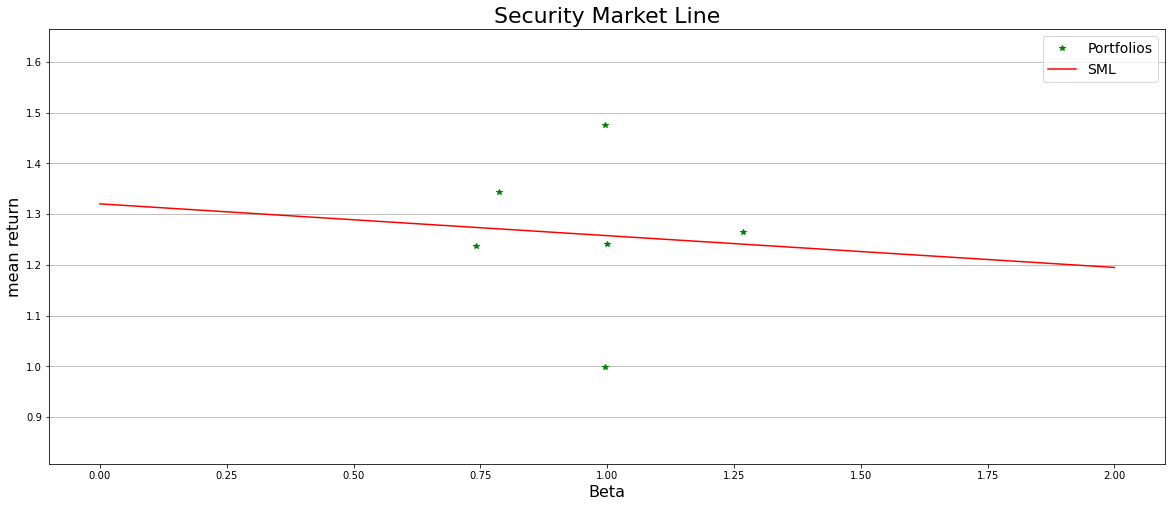

In [31]:
plt.figure(figsize=(20,8))
# scatter-plot data
plt.axis('equal')
x = np.array([0, 2])
y = p.const + p.Beta * x
plt.xlabel('Beta',fontsize=16)
plt.ylabel('mean return',fontsize=16)  
plt.title('Security Market Line', fontsize=22)
plt.grid(axis='y')


plt.plot(Beta_table, Mean_table, 'b*',color = 'green',label='Portfolios')

plt.plot(x, y, label='SML', color = 'red')
plt.legend(fontsize=14)

plt.show()

